CH10

#  회귀진단

In [3]:
library(lmtest)

## 데이터 입력

In [5]:
dt <- data.frame(x = c(15,26,10,9,15,20,18,11,
                       8,20,7,9,10,11,11,10,12,42,17,11,10),
                 y = c(95,71,83,91,102,87,93,100,
                       104,94,113,96,83,84,102,100,
                       105,57,121,86,100))

### 산점도 

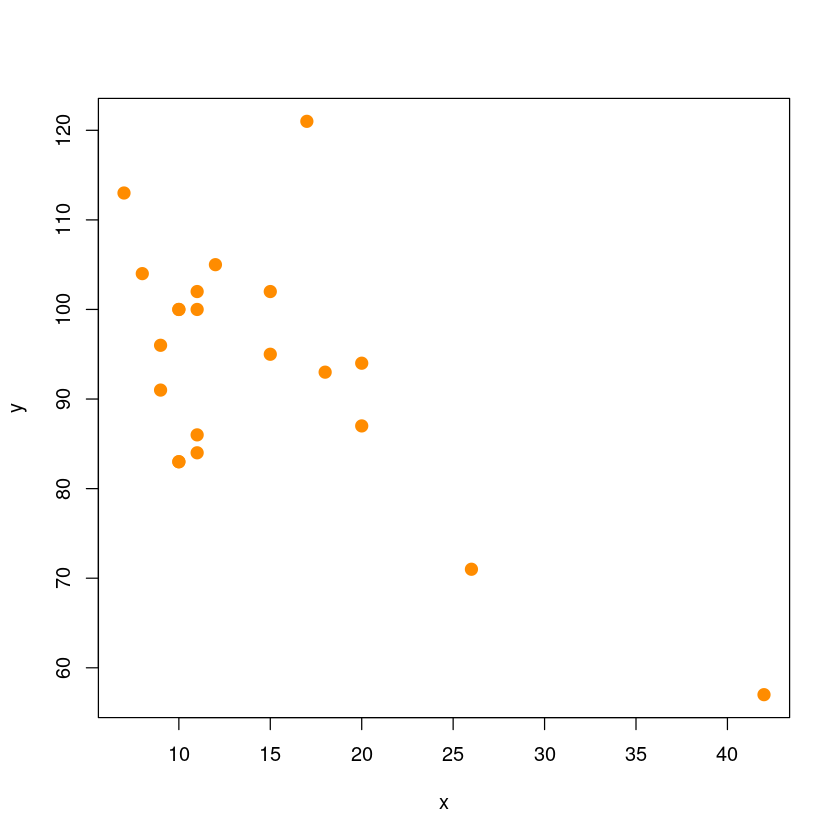

In [6]:
plot(y~x, dt,pch  = 20,cex  = 2,col  = "darkorange")

### 회귀적합 

In [7]:
model_reg <- lm(y~x, dt)

In [8]:
summary(model_reg)


Call:
lm(formula = y ~ x, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.604  -8.731   1.396   4.523  30.285 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 109.8738     5.0678  21.681 7.31e-15 ***
x            -1.1270     0.3102  -3.633  0.00177 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.02 on 19 degrees of freedom
Multiple R-squared:   0.41,	Adjusted R-squared:  0.3789 
F-statistic:  13.2 on 1 and 19 DF,  p-value: 0.001769


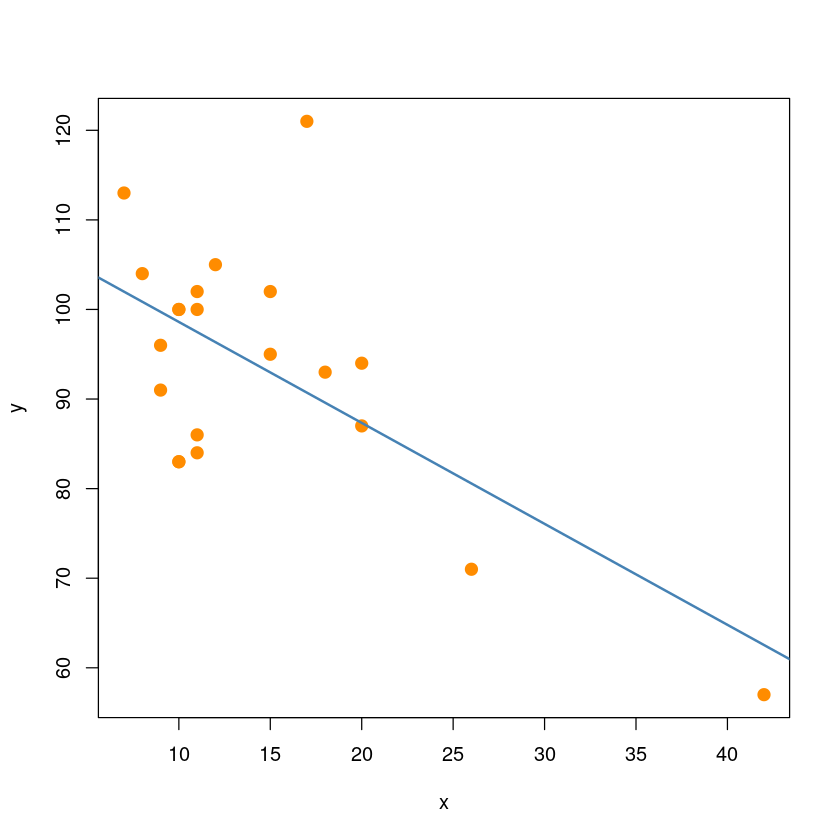

In [10]:
plot(y~x, dt,pch  = 20,cex  = 2,col  = "darkorange")
abline(model_reg, col='steelblue', lwd=2)

### 잔차 

In [12]:
residual <- model_reg$residuals  ## e_i = y_i - hat(y_i)
## resid(model_reg)

### 내적으로 표준화된 잔차

In [14]:
s_residual<- rstandard(model_reg)

In [15]:
# # 또는
# s_xx <- sum((dt$x-mean(dt$x))^2)  #S_xx
# h_ii <- 1/21 + (dt$x- mean(dt$x))^2/s_xx
# ## h_ii <- influence(model_reg)$hat
# hat_sigma <-  summary(model_reg)$sigma   #hat sigma
# s_residual <- residual/(hat_sigma*sqrt(1-h_ii)) ## 내적

### 외적으로 스튜던트화된 잔차

In [18]:
s_residual_i <- rstudent(model_reg) ## 외적으로 스튜던트화 잔차

In [19]:
# # 또는
# hat_sigma_i <- sqrt(((21-1-1)*hat_sigma^2 - residual^2/(1-h_ii) )/(21-1-2))
# ## hat_sigma_i <- influence(model_reg)$sigma
# s_residual_i <-  residual/(hat_sigma_i*sqrt(1-h_ii)) ## 외적

### 잔차그림 

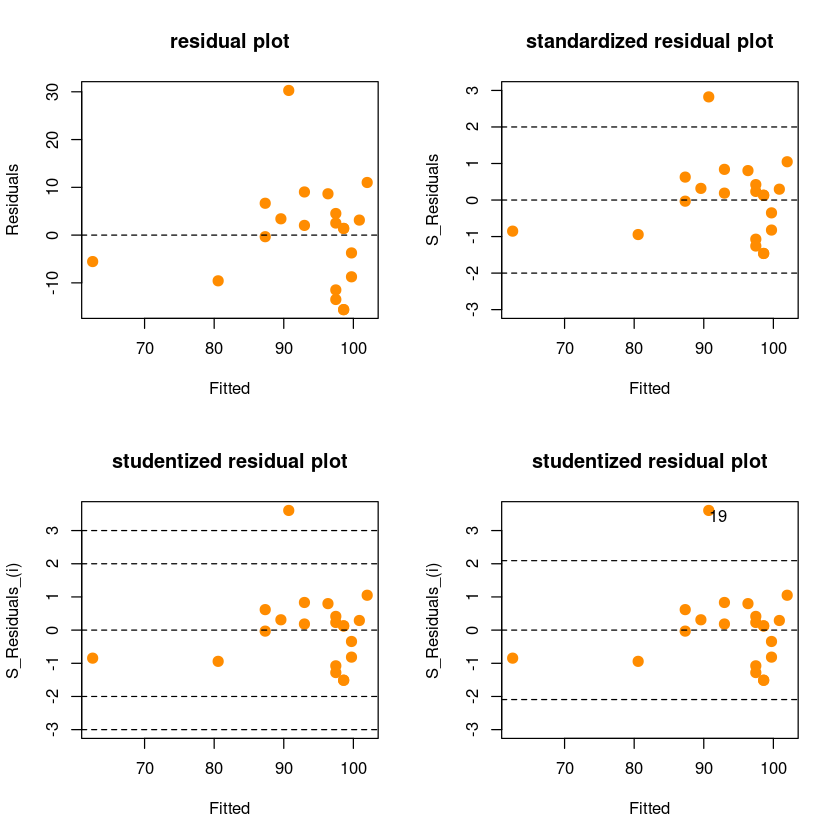

In [20]:
par(mfrow = c(2, 2))

plot(fitted(model_reg), residual, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "Residuals", 
     main = "residual plot")
abline(h=0, lty=2)

plot(fitted(model_reg), s_residual, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals", 
     ylim=c(min(-3, min(s_residual)), 
            max(3,max(s_residual))),
     main = "standardized residual plot")
abline(h=c(-2,0,2), lty=2)

plot(fitted(model_reg), s_residual_i, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals_(i)", 
     ylim=c(min(-3, min(s_residual_i)), 
            max(3,max(s_residual_i))),
     main = "studentized residual plot")
abline(h=c(-3,-2,0,2,3), lty=2)

plot(fitted(model_reg), s_residual_i, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals_(i)", 
     ylim=c(min(-3, min(s_residual_i)), 
            max(3,max(s_residual_i))),
     main = "studentized residual plot")
abline(h=c(-qt(0.975,21-2),0,qt(0.975,21-2)), lty=2)
text (fitted(model_reg)[which(abs(s_residual_i)>qt(0.975,21-2))],
      s_residual_i[which(abs(s_residual_i)>qt(0.975,21-2))], 
      which(abs(s_residual_i)>qt(0.975,21-2)),adj = c(0,1))


In [21]:
## 이상치 검정
qt(0.975,21-2) #기각역 

[1] 2.093024

In [22]:
s_residual_i

1           2           3           4           5           6 
 0.18396849 -0.94158335 -1.51081192 -0.81426336  0.83286292 -0.03063183 
          7           8           9          10          11          12 
 0.31124676  0.22971575  0.28991014  0.61766026  1.05084716 -0.34283148 
         13          14          15          16          17          18 
-1.51081192 -1.27977575  0.41315320  0.12739342  0.79828114 -0.84511086 
         19          20          21 
 3.60697972 -1.07648108  0.12739342

In [23]:
s_residual_i[which(abs(s_residual_i)>qt(0.975,21-2))]

19 
3.60698

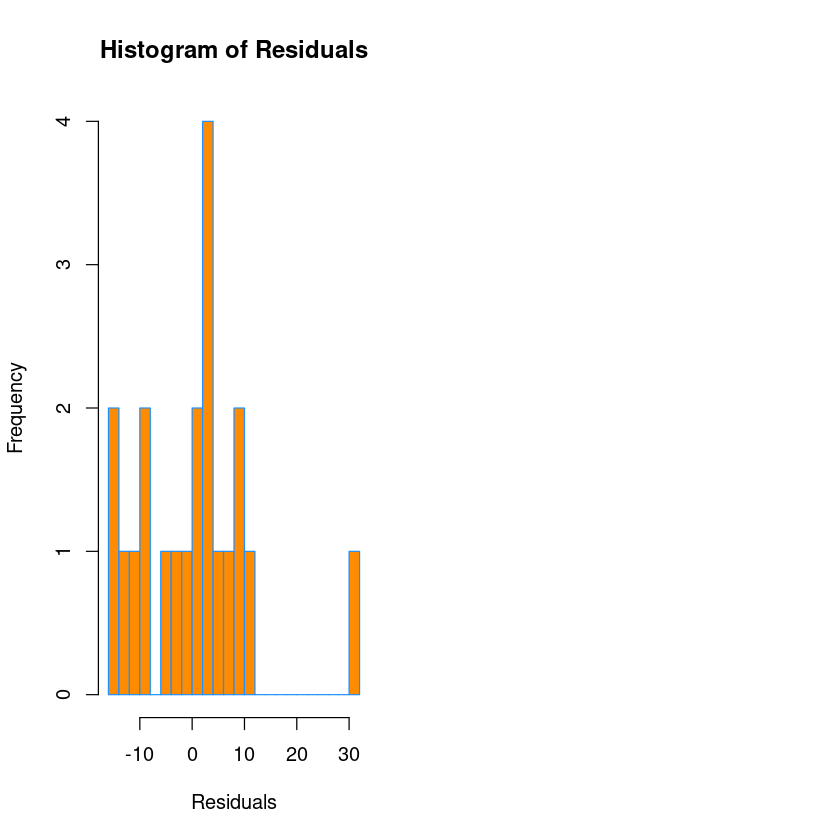

In [24]:
## 정규성 검정
par(mfrow=c(1,2))
hist(resid(model_reg),
     xlab   = "Residuals",
     main   = "Histogram of Residuals",
     col    = "darkorange",
     border = "dodgerblue",
     breaks = 20)

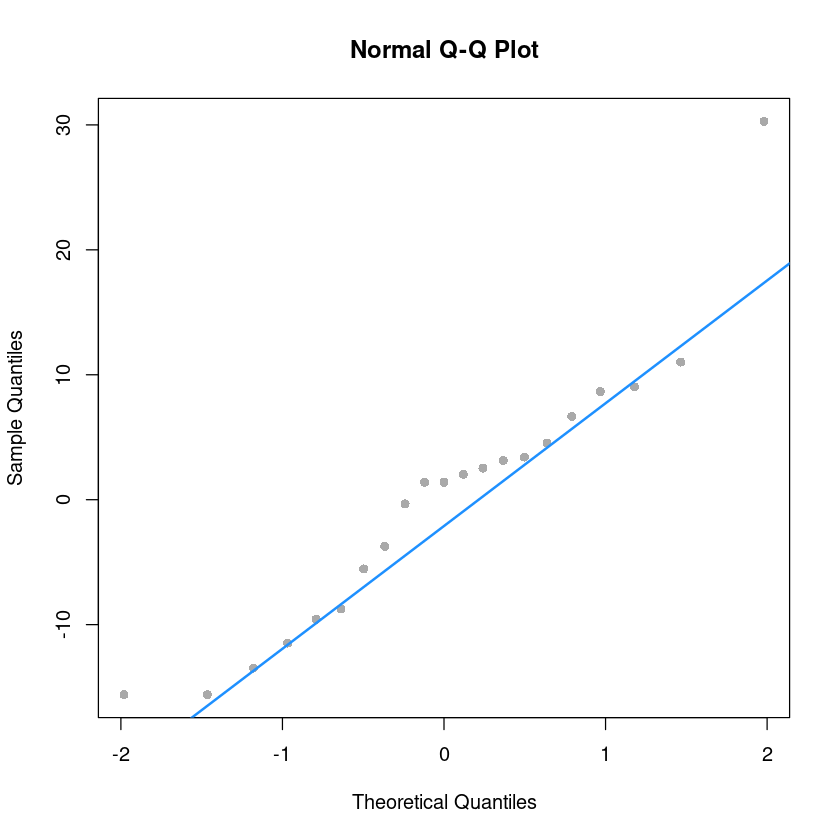

In [26]:
qqnorm(resid(model_reg), 
       main = "Normal Q-Q Plot", 
       col = "darkgrey",
       pch=16)
qqline(resid(model_reg), col = "dodgerblue", lwd = 2)

In [27]:
graphics.off()

### 독립성 검정

In [28]:
lmtest::dwtest(model_reg)


	Durbin-Watson test

data:  model_reg
DW = 2.0844, p-value = 0.5716
alternative hypothesis: true autocorrelation is greater than 0


### 영향점

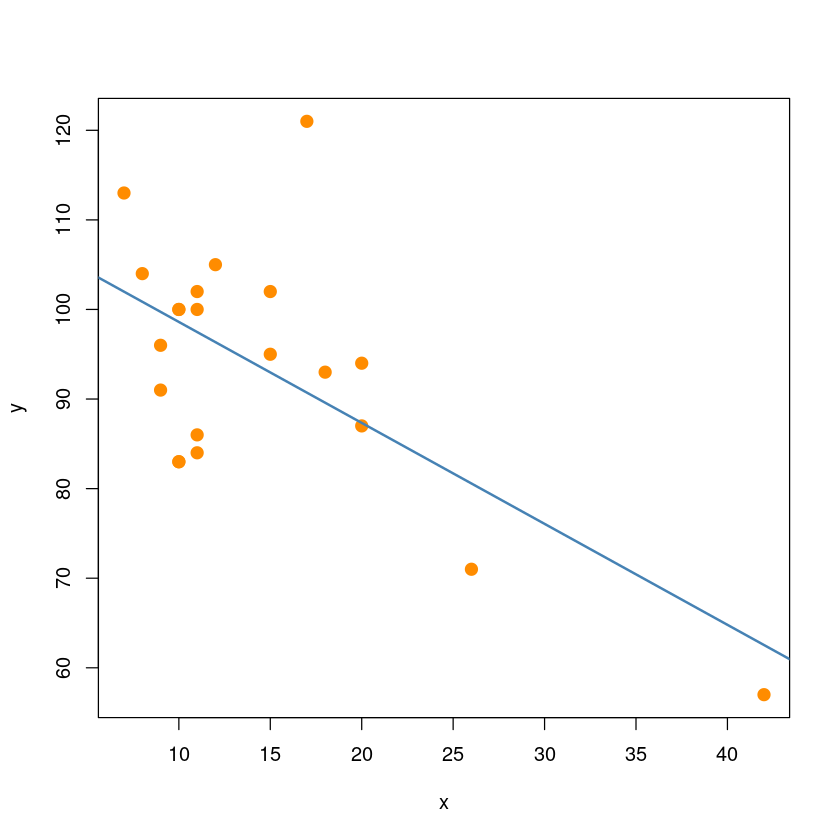

In [29]:
par(mfrow=c(1,1))
plot(y~x, dt,pch  = 20,cex  = 2,col  = "darkorange")
abline(model_reg, col='steelblue', lwd=2)

In [32]:
# influence(model_reg)
influence.measures(model_reg)

Influence measures of
	 lm(formula = y ~ x, data = dt) :

     dfb.1_    dfb.x    dffit cov.r   cook.d    hat inf
1   0.01664  0.00328  0.04127 1.166 8.97e-04 0.0479    
2   0.18862 -0.33480 -0.40252 1.197 8.15e-02 0.1545    
3  -0.33098  0.19239 -0.39114 0.936 7.17e-02 0.0628    
4  -0.20004  0.12788 -0.22433 1.115 2.56e-02 0.0705    
5   0.07532  0.01487  0.18686 1.085 1.77e-02 0.0479    
6   0.00113 -0.00503 -0.00857 1.201 3.88e-05 0.0726    
7   0.00447  0.03266  0.07722 1.170 3.13e-03 0.0580    
8   0.04430 -0.02250  0.05630 1.174 1.67e-03 0.0567    
9   0.07907 -0.05427  0.08541 1.200 3.83e-03 0.0799    
10 -0.02283  0.10141  0.17284 1.152 1.54e-02 0.0726    
11  0.31560 -0.22889  0.33200 1.088 5.48e-02 0.0908    
12 -0.08422  0.05384 -0.09445 1.183 4.68e-03 0.0705    
13 -0.33098  0.19239 -0.39114 0.936 7.17e-02 0.0628    
14 -0.24681  0.12536 -0.31367 0.992 4.76e-02 0.0567    
15  0.07968 -0.04047  0.10126 1.159 5.36e-03 0.0567    
16  0.02791 -0.01622  0.03298 1.187 5.74e-04 0

In [33]:
hatvalues(model_reg)

1          2          3          4          5          6          7 
0.04792248 0.15451323 0.06281578 0.07054521 0.04792248 0.07261896 0.05798959 
         8          9         10         11         12         13         14 
0.05666993 0.07985823 0.07261896 0.09075485 0.07054521 0.06281578 0.05666993 
        15         16         17         18         19         20         21 
0.05666993 0.06281578 0.05210768 0.65160998 0.05305030 0.05666993 0.06281578

In [34]:
dffits(model_reg)  

1            2            3            4            5            6 
 0.041274036 -0.402520687 -0.391140045 -0.224328534  0.186855984 -0.008571736 
           7            8            9           10           11           12 
 0.077223953  0.056303487  0.085407473  0.172840518  0.331996854 -0.094449643 
          13           14           15           16           17           18 
-0.391140045 -0.313673908  0.101264129  0.032981383  0.187166128 -1.155778731 
          19           20           21 
 0.853737107 -0.263846244  0.032981383

In [35]:
cooks.distance(model_reg)

1            2            3            4            5            6 
8.974064e-04 8.149796e-02 7.165814e-02 2.561596e-02 1.774366e-02 3.877627e-05 
           7            8            9           10           11           12 
3.130575e-03 1.668209e-03 3.831949e-03 1.543952e-02 5.481014e-02 4.677623e-03 
          13           14           15           16           17           18 
7.165814e-02 4.759781e-02 5.361216e-03 5.735845e-04 1.785650e-02 6.781120e-01 
          19           20           21 
2.232883e-01 3.451889e-02 5.735845e-04

In [36]:
covratio(model_reg)

1         2         3         4         5         6         7         8 
1.1658918 1.1969990 0.9363474 1.1151027 1.0850411 1.2013200 1.1701576 1.1742373 
        9        10        11        12        13        14        15        16 
1.1996682 1.1520913 1.0878396 1.1832616 0.9363474 0.9923313 1.1590453 1.1867369 
       17        18        19        20        21 
1.0964388 2.9586827 0.3964316 1.0425728 1.1867369

In [37]:
summary(influence.measures(model_reg))

Potentially influential observations of
	 lm(formula = y ~ x, data = dt) :

   dfb.1_ dfb.x   dffit   cov.r   cook.d hat    
18  0.83  -1.11_* -1.16_*  2.96_*  0.68   0.65_*
19  0.14   0.27    0.85    0.40_*  0.22   0.05  


### 기각역

In [38]:
p <- 1

In [40]:
n <- 21

In [41]:
2*(p+1)/n #hat (h_ii)

[1] 0.1904762

In [42]:
2*sqrt((p+1)/(n-p-1)) #Dffits

[1] 0.6488857

In [43]:
qf(0.5, p+1, n-p-1) #Cook d

[1] 0.7190606

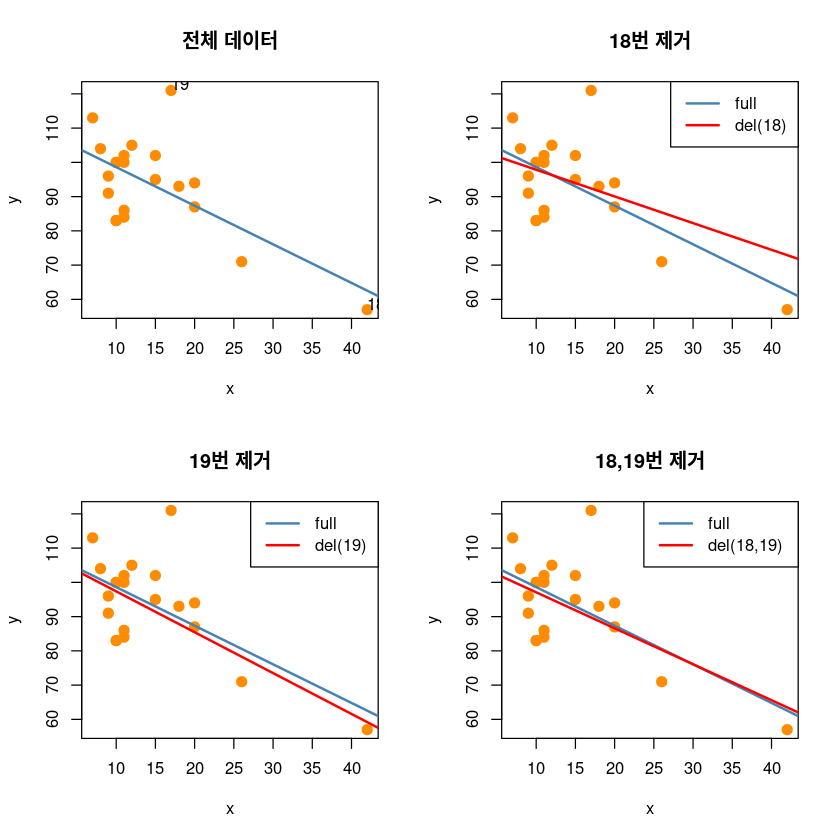

In [46]:
par(mfrow=c(2,2))
plot(y~x, dt,pch  = 20,
     cex  = 2,col  = "darkorange",
     main = "전체 데이터")
abline(model_reg, col='steelblue', lwd=2)
text (dt[18:19,],c('18', '19'),adj = c(0,0))

## 18제거 전후 
plot(y~x, dt,pch  = 20,
     cex  = 2,col  = "darkorange",
     main = "18번 제거")
abline(model_reg, col='steelblue', lwd=2)
abline(lm(y~x, dt[-18,]), col='red', lwd=2)
legend('topright', legend=c("full", "del(18)"),
       col=c('steelblue', 'red'), lty=1, lwd=2)
# high leverage and high influence, not outlier

## 19제거 전후 
plot(y~x, dt,pch  = 20,
     cex  = 2,col  = "darkorange",
     main = "19번 제거")
abline(model_reg, col='steelblue', lwd=2)
abline(lm(y~x, dt[-19,]), col='red', lwd=2)
legend('topright', legend=c("full", "del(19)"),
       col=c('steelblue', 'red'), lty=1, lwd=2)
# not leverage and high influence, outlier


## 18, 19제거 전후 
plot(y~x, dt,pch  = 20,
     cex  = 2,col  = "darkorange",
     main = "18,19번 제거")
abline(model_reg, col='steelblue', lwd=2)
abline(lm(y~x, dt[-c(18,19),]), col='red', lwd=2)
legend('topright', legend=c("full", "del(18,19)"),
       col=c('steelblue', 'red'), lty=1, lwd=2)

### 회귀진단 그림 

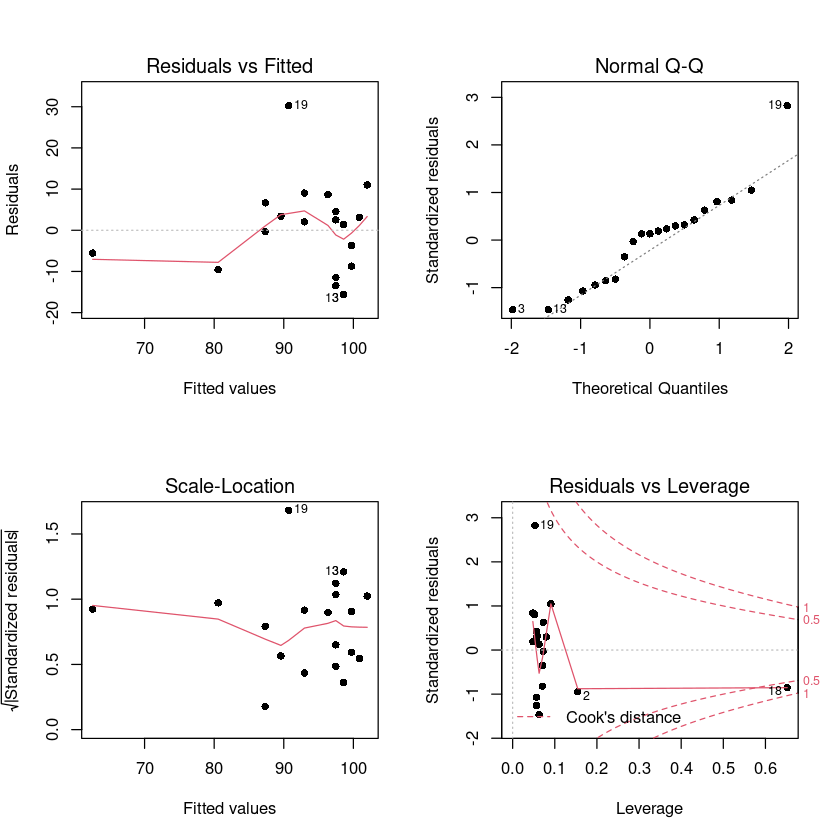

In [47]:
par(mfrow = c(2, 2))
plot(model_reg, pch=16)

### Hitters

In [49]:
library(ISLR)

In [50]:
hitters <- na.omit(Hitters)

In [51]:
dim(hitters)

[1] 263  20

In [52]:
head(hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A


In [53]:
reg_model <- lm(Salary ~ AtBat + Hits + HmRun, hitters)

In [54]:
summary(reg_model)


Call:
lm(formula = Salary ~ AtBat + Hits + HmRun, data = hitters)

Residuals:
    Min      1Q  Median      3Q     Max 
-884.75 -214.97  -58.05  175.88 1991.53 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  158.754     75.815   2.094  0.03724 *  
AtBat         -1.564      0.641  -2.440  0.01536 *  
Hits           8.329      2.053   4.056 6.61e-05 ***
HmRun          9.502      3.384   2.808  0.00536 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 398.9 on 259 degrees of freedom
Multiple R-squared:  0.2271,	Adjusted R-squared:  0.2182 
F-statistic: 25.37 on 3 and 259 DF,  p-value: 2.013e-14


In [55]:
vcov(reg_model)

,(Intercept),AtBat,Hits,HmRun
(Intercept),5747.87524,-26.2127535,48.158691,21.0663196
AtBat,-26.21275,0.4108477,-1.249666,-0.4193544
Hits,48.15869,-1.2496656,4.216189,0.1404930
HmRun,21.06632,-0.4193544,0.140493,11.4506363


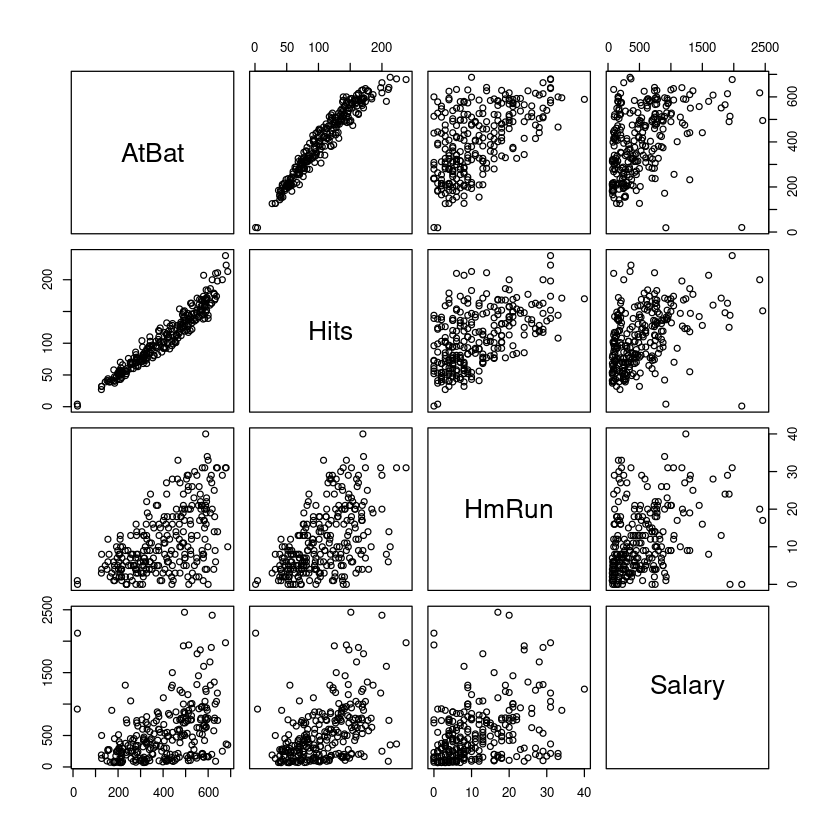

In [56]:
pairs(hitters[,c(1,2,3,19)])

In [57]:
## 잔차그림 
residual <- resid(reg_model)
stad.res <- rstandard(reg_model)
stu.res <- rstudent(reg_model)

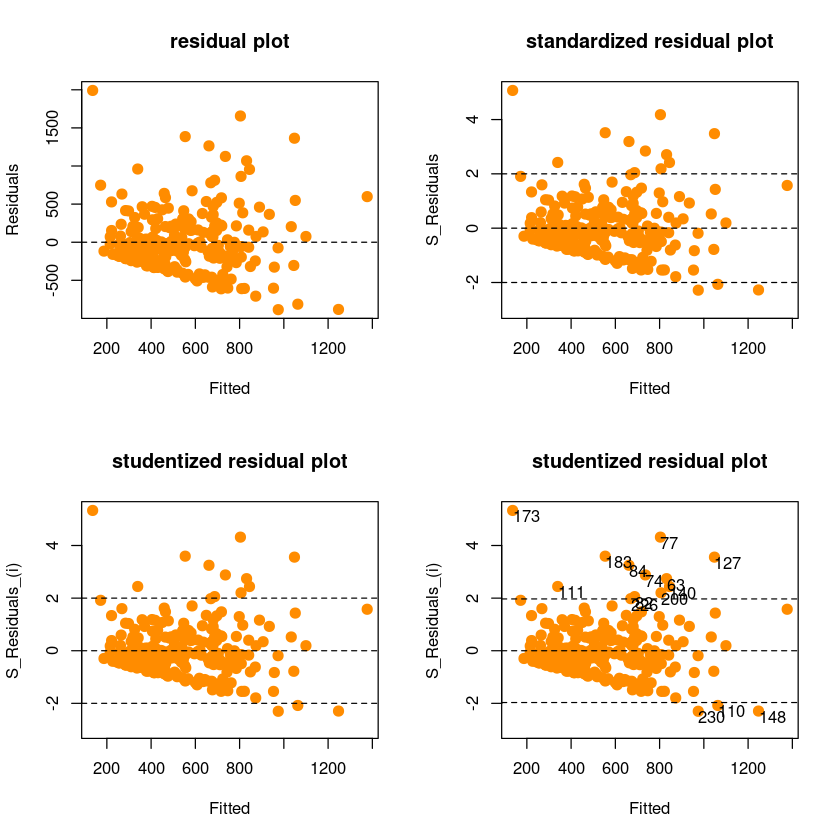

In [58]:
par(mfrow = c(2, 2))
plot(fitted(reg_model), residual, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "Residuals", 
     main = "residual plot")
abline(h=0, lty=2)

plot(fitted(reg_model), stad.res, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals", 
     ylim=c(min(-3, min(stad.res)), 
            max(3,max(stad.res))),
     main = "standardized residual plot")
abline(h=c(-2,0,2), lty=2)

plot(fitted(reg_model), stu.res, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals_(i)", 
     ylim=c(min(-3, min(stu.res)), 
            max(3,max(stu.res))),
     main = "studentized residual plot")
abline(h=c(-2,0,2), lty=2)

plot(fitted(reg_model), stu.res, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals_(i)", 
     ylim=c(min(-3, min(stu.res)), 
            max(3,max(stu.res))),
     main = "studentized residual plot")
abline(h=c(-qt(0.975,nrow(hitters)-4),0,qt(0.975,nrow(hitters)-4)), lty=2)
text (fitted(reg_model)[which(abs(stu.res)>qt(0.975,nrow(hitters)-4))],
      stu.res[which(abs(stu.res)>qt(0.975,nrow(hitters)-4))], 
      which(abs(stu.res)>qt(0.975,nrow(hitters)-4)),adj = c(0,1))

In [59]:
stu.res[abs(stu.res)>qt(0.975,nrow(hitters)-4)]

-Dale Murphy    -Dave Winfield     -Eddie Murray     -George Brett 
         2.740338          2.880893          4.318954          2.057822 
     -Gary Carter       -Joe Carter       -Jack Clark         -Jim Rice 
         3.248663         -2.080713          2.442917          3.558398 
 -Keith Hernandez    -Kirby Puckett     -Mike Schmidt      -Ozzie Smith 
         2.440566         -2.293728          5.333664          3.594832 
-Rickey Henderson     -Steve Garvey        -Steve Sax 
         2.202444          1.979316         -2.302013

In [60]:
which(abs(stu.res)>qt(0.975,nrow(hitters)-4))

-Dale Murphy    -Dave Winfield     -Eddie Murray     -George Brett 
               63                74                77                82 
     -Gary Carter       -Joe Carter       -Jack Clark         -Jim Rice 
               84               110               111               127 
 -Keith Hernandez    -Kirby Puckett     -Mike Schmidt      -Ozzie Smith 
              140               148               173               183 
-Rickey Henderson     -Steve Garvey        -Steve Sax 
              200               226               230

In [61]:
influence(reg_model)

,(Intercept),AtBat,Hits,HmRun
-Alan Ashby,0.65924938,-4.086660e-04,-1.281158e-03,-0.0083503671
-Alvin Davis,0.19498183,-6.704304e-04,-2.345890e-04,-0.0516648778
-Andre Dawson,0.06576750,1.100954e-02,-4.016280e-02,-0.0970298280
-Andres Galarraga,-4.21682830,1.761848e-02,-3.703466e-02,-0.0320576617
-Alfredo Griffin,-0.77018454,2.388378e-03,9.127765e-03,-0.0763167161
-Al Newman,-2.01620004,-2.341329e-03,2.006901e-02,0.0297530788
-Argenis Salazar,-1.85154500,-6.368273e-03,2.098820e-02,0.1194087080
-Andres Thomas,-2.56590064,-5.396923e-03,2.574708e-02,0.0672680286
-Andre Thornton,0.10303912,6.698207e-02,-2.553939e-01,0.2464785215
-Alan Trammell,2.03660813,-3.586078e-03,-7.094059e-03,-0.0733319660


In [62]:
influence.measures(reg_model)

Influence measures of
	 lm(formula = Salary ~ AtBat + Hits + HmRun, data = hitters) :

                      dfb.1_  dfb.AtBt  dfb.Hits  dfb.HmRn     dffit cov.r
-Alan Ashby         8.68e-03 -6.36e-04 -6.23e-04 -2.46e-03  0.012536 1.021
-Alvin Davis        2.57e-03 -1.04e-03 -1.14e-04 -1.52e-02 -0.035436 1.018
-Andre Dawson       8.66e-04  1.72e-02 -1.95e-02 -2.86e-02 -0.056997 1.018
-Andres Galarraga  -5.56e-02  2.75e-02 -1.80e-02 -9.47e-03 -0.071519 1.006
-Alfredo Griffin   -1.01e-02  3.72e-03  4.44e-03 -2.25e-02  0.030079 1.041
-Al Newman         -2.65e-02 -3.65e-03  9.76e-03  8.78e-03 -0.035316 1.029
-Argenis Salazar   -2.44e-02 -9.92e-03  1.02e-02  3.52e-02 -0.053094 1.023
-Andres Thomas     -3.38e-02 -8.41e-03  1.25e-02  1.99e-02 -0.059697 1.012
-Andre Thornton     1.36e-03  1.05e-01 -1.25e-01  7.31e-02  0.177184 0.987
-Alan Trammell      2.68e-02 -5.59e-03 -3.45e-03 -2.16e-02 -0.067532 1.019
-Alex Trevino       4.92e-02 -2.10e-02  1.16e-02 -3.71e-03  0.051902 1.024
-Andy VanSlyk

In [63]:
summary(influence.measures(reg_model))

Potentially influential observations of
	 lm(formula = Salary ~ AtBat + Hits + HmRun, data = hitters) :

                 dfb.1_ dfb.AtBt dfb.Hits dfb.HmRn dffit   cov.r   cook.d
-Don Mattingly    0.01  -0.38     0.42     0.15     0.50_*  1.07_*  0.06 
-Dale Murphy     -0.17   0.11    -0.09     0.24     0.40_*  0.92_*  0.04 
-Dave Winfield   -0.14   0.12    -0.11     0.17     0.34    0.91_*  0.03 
-Eddie Murray     0.06  -0.32     0.36     0.09     0.49_*  0.78_*  0.06 
-George Bell     -0.01  -0.02     0.02     0.02     0.04    1.05_*  0.00 
-Gary Carter     -0.06   0.11    -0.13     0.26     0.38_*  0.88_*  0.03 
-Gary Gaetti      0.01   0.01    -0.01    -0.03    -0.03    1.05_*  0.00 
-Jesse Barfield  -0.01  -0.03     0.02     0.10     0.12    1.06_*  0.00 
-Jack Clark       0.20  -0.03    -0.03     0.06     0.24    0.94_*  0.01 
-Jim Rice        -0.05  -0.43     0.54     0.05     0.67_*  0.87_*  0.11 
-Keith Hernandez -0.02  -0.18     0.25    -0.07     0.34    0.94_*  0.03 
-Kirby 

### 기각역

In [64]:
p <- 3

In [65]:
n <- nrow(hitters)

In [66]:
2*(p+1)/n #hat (h_ii)

[1] 0.03041825

In [67]:
3*sqrt((p+1)/(n-p-1)) #Dffits

[1] 0.3728219

In [68]:
2*sqrt((p+1)/(n)) #Dffits

[1] 0.2466506

In [69]:
qf(0.5, p+1, n-p-1) #Cook d

[1] 0.8413752

### 변수 변환

In [71]:
hitters$log_Salary <- log(hitters$Salary)

In [72]:
reg_model_2 <- lm(log_Salary ~ AtBat + Hits + HmRun, hitters)

In [73]:
summary(reg_model_2)


Call:
lm(formula = log_Salary ~ AtBat + Hits + HmRun, data = hitters)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2664 -0.6572  0.1122  0.5639  2.5886 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.103575   0.149615  34.111  < 2e-16 ***
AtBat       -0.002179   0.001265  -1.722 0.086196 .  
Hits         0.014012   0.004052   3.458 0.000636 ***
HmRun        0.016540   0.006678   2.477 0.013895 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7872 on 259 degrees of freedom
Multiple R-squared:  0.2253,	Adjusted R-squared:  0.2163 
F-statistic:  25.1 on 3 and 259 DF,  p-value: 2.729e-14


### 잔차그림 

In [75]:
residual <- resid(reg_model_2)
stad.res <- rstandard(reg_model_2)
stu.res <- rstudent(reg_model_2)

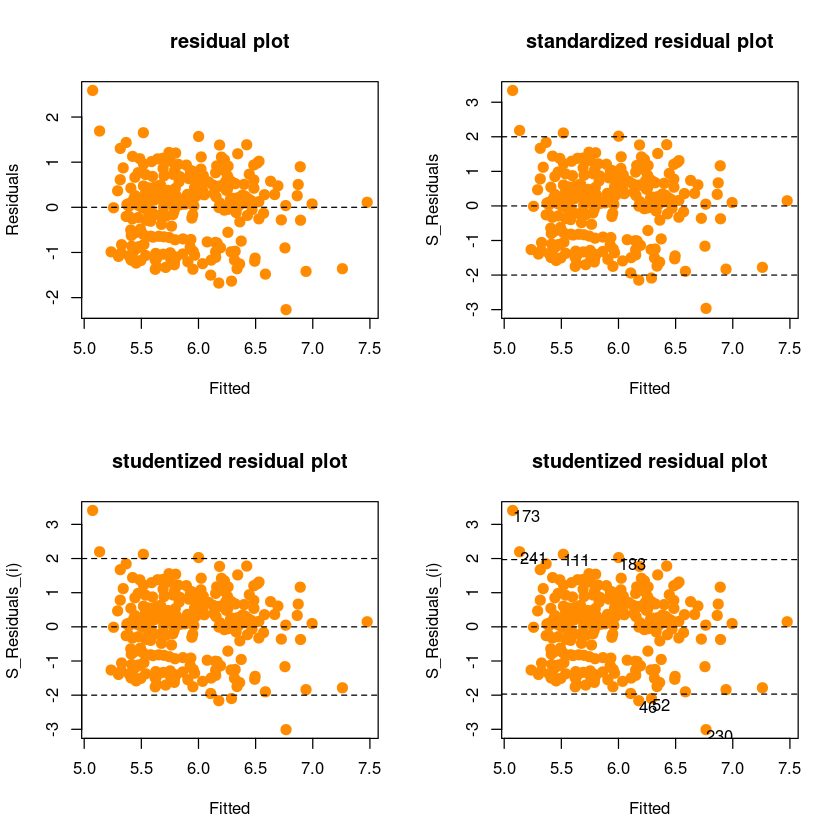

In [76]:
par(mfrow = c(2, 2))
plot(fitted(reg_model_2), residual, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "Residuals", 
     main = "residual plot")
abline(h=0, lty=2)

plot(fitted(reg_model_2), stad.res, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals", 
     ylim=c(min(-3, min(stad.res)), 
            max(3,max(stad.res))),
     main = "standardized residual plot")
abline(h=c(-2,0,2), lty=2)

plot(fitted(reg_model_2), stu.res, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals_(i)", 
     ylim=c(min(-3, min(stu.res)), 
            max(3,max(stu.res))),
     main = "studentized residual plot")
abline(h=c(-2,0,2), lty=2)

plot(fitted(reg_model_2), stu.res, 
     pch=20,cex  = 2,col  = "darkorange",
     xlab = "Fitted", ylab = "S_Residuals_(i)", 
     ylim=c(min(-3, min(stu.res)), 
            max(3,max(stu.res))),
     main = "studentized residual plot")
abline(h=c(-qt(0.975,nrow(hitters)-4),0,qt(0.975,nrow(hitters)-4)), lty=2)
text (fitted(reg_model_2)[which(abs(stu.res)>qt(0.975,nrow(hitters)-4))],
      stu.res[which(abs(stu.res)>qt(0.975,nrow(hitters)-4))], 
      which(abs(stu.res)>qt(0.975,nrow(hitters)-4)),adj = c(0,1))

In [77]:
stu.res[abs(stu.res)>qt(0.975,nrow(hitters)-4)]

-Cory Snyder -Darnell Coles    -Jack Clark  -Mike Schmidt   -Ozzie Smith 
     -2.161828      -2.098726       2.123858       3.408270       2.028616 
    -Steve Sax -Terry Kennedy 
     -3.009340       2.198493

In [78]:
which(abs(stu.res)>qt(0.975,nrow(hitters)-4))

-Cory Snyder -Darnell Coles    -Jack Clark  -Mike Schmidt   -Ozzie Smith 
            46             52            111            173            183 
    -Steve Sax -Terry Kennedy 
           230            241

In [79]:
influence(reg_model_2)

,(Intercept),AtBat,Hits,HmRun
-Alan Ashby,4.817418e-03,-2.986297e-06,-9.361969e-06,-6.101971e-05
-Alvin Davis,5.783712e-06,-1.988686e-08,-6.958574e-09,-1.532526e-06
-Andre Dawson,3.051739e-05,5.108640e-06,-1.863631e-05,-4.502371e-05
-Andres Galarraga,-1.394196e-02,5.825139e-05,-1.224464e-04,-1.059912e-04
-Alfredo Griffin,-3.880218e-03,1.203274e-05,4.598602e-05,-3.844865e-04
-Al Newman,-1.699795e-02,-1.973901e-05,1.691955e-04,2.508389e-04
-Argenis Salazar,-8.046090e-03,-2.767402e-05,9.120649e-05,5.189035e-04
-Andres Thomas,-1.089006e-02,-2.290534e-05,1.092744e-04,2.854954e-04
-Andre Thornton,1.934670e-04,1.257660e-04,-4.795294e-04,4.627899e-04
-Alan Trammell,1.368784e-03,-2.410167e-06,-4.767847e-06,-4.928569e-05


In [80]:
influence.measures(reg_model_2)

Influence measures of
	 lm(formula = log_Salary ~ AtBat + Hits + HmRun, data = hitters) :

                      dfb.1_  dfb.AtBt  dfb.Hits  dfb.HmRn     dffit cov.r
-Alan Ashby         3.22e-02 -2.36e-03 -2.31e-03 -9.13e-03  0.046453 1.015
-Alvin Davis        3.86e-05 -1.57e-05 -1.71e-06 -2.29e-04 -0.000532 1.022
-Andre Dawson       2.04e-04  4.03e-03 -4.59e-03 -6.73e-03 -0.013393 1.024
-Andres Galarraga  -9.35e-02  4.62e-02 -3.03e-02 -1.59e-02 -0.120216 0.980
-Alfredo Griffin   -2.59e-02  9.50e-03  1.13e-02 -5.75e-02  0.076818 1.037
-Al Newman         -1.14e-01 -1.56e-02  4.18e-02  3.76e-02 -0.151315 1.005
-Argenis Salazar   -5.38e-02 -2.19e-02  2.25e-02  7.77e-02 -0.117140 1.007
-Andres Thomas     -7.30e-02 -1.82e-02  2.71e-02  4.29e-02 -0.128939 0.978
-Andre Thornton     1.30e-03  9.97e-02 -1.19e-01  6.95e-02  0.168499 0.991
-Alan Trammell      9.13e-03 -1.90e-03 -1.17e-03 -7.37e-03 -0.022981 1.025
-Alex Trevino       1.01e-01 -4.29e-02  2.38e-02 -7.59e-03  0.106184 1.012
-Andy Van

In [81]:
summary(influence.measures(reg_model_2))

Potentially influential observations of
	 lm(formula = log_Salary ~ AtBat + Hits + HmRun, data = hitters) :

                dfb.1_ dfb.AtBt dfb.Hits dfb.HmRn dffit   cov.r   cook.d
-Don Mattingly   0.00  -0.04     0.04     0.01     0.05    1.12_*  0.00 
-George Bell     0.00  -0.01     0.01     0.01     0.02    1.05_*  0.00 
-Gary Gaetti     0.00   0.00     0.00     0.01     0.01    1.05_*  0.00 
-Jesse Barfield -0.01  -0.02     0.01     0.06     0.07    1.06_*  0.00 
-Kirby Puckett   0.04   0.28    -0.32    -0.17    -0.43_*  1.02    0.05 
-Mike Schmidt    0.60  -0.26     0.12     0.03     0.61_*  0.88_*  0.09 
-Spike Owen     -0.02   0.03    -0.03    -0.03     0.04    1.05_*  0.00 
-Steve Sax       0.06   0.38    -0.54     0.34    -0.73_*  0.94_*  0.13 
-Tony Gwynn      0.01   0.05    -0.06     0.02    -0.08    1.06_*  0.00 
-Terry Kennedy   0.40  -0.21     0.11     0.04     0.40_*  0.97    0.04 
-Vince Coleman   0.10  -0.16     0.13     0.14    -0.21    1.06_*  0.01 
-Wade Boggs    

In [82]:
summary(influence.measures(reg_model))

Potentially influential observations of
	 lm(formula = Salary ~ AtBat + Hits + HmRun, data = hitters) :

                 dfb.1_ dfb.AtBt dfb.Hits dfb.HmRn dffit   cov.r   cook.d
-Don Mattingly    0.01  -0.38     0.42     0.15     0.50_*  1.07_*  0.06 
-Dale Murphy     -0.17   0.11    -0.09     0.24     0.40_*  0.92_*  0.04 
-Dave Winfield   -0.14   0.12    -0.11     0.17     0.34    0.91_*  0.03 
-Eddie Murray     0.06  -0.32     0.36     0.09     0.49_*  0.78_*  0.06 
-George Bell     -0.01  -0.02     0.02     0.02     0.04    1.05_*  0.00 
-Gary Carter     -0.06   0.11    -0.13     0.26     0.38_*  0.88_*  0.03 
-Gary Gaetti      0.01   0.01    -0.01    -0.03    -0.03    1.05_*  0.00 
-Jesse Barfield  -0.01  -0.03     0.02     0.10     0.12    1.06_*  0.00 
-Jack Clark       0.20  -0.03    -0.03     0.06     0.24    0.94_*  0.01 
-Jim Rice        -0.05  -0.43     0.54     0.05     0.67_*  0.87_*  0.11 
-Keith Hernandez -0.02  -0.18     0.25    -0.07     0.34    0.94_*  0.03 
-Kirby 

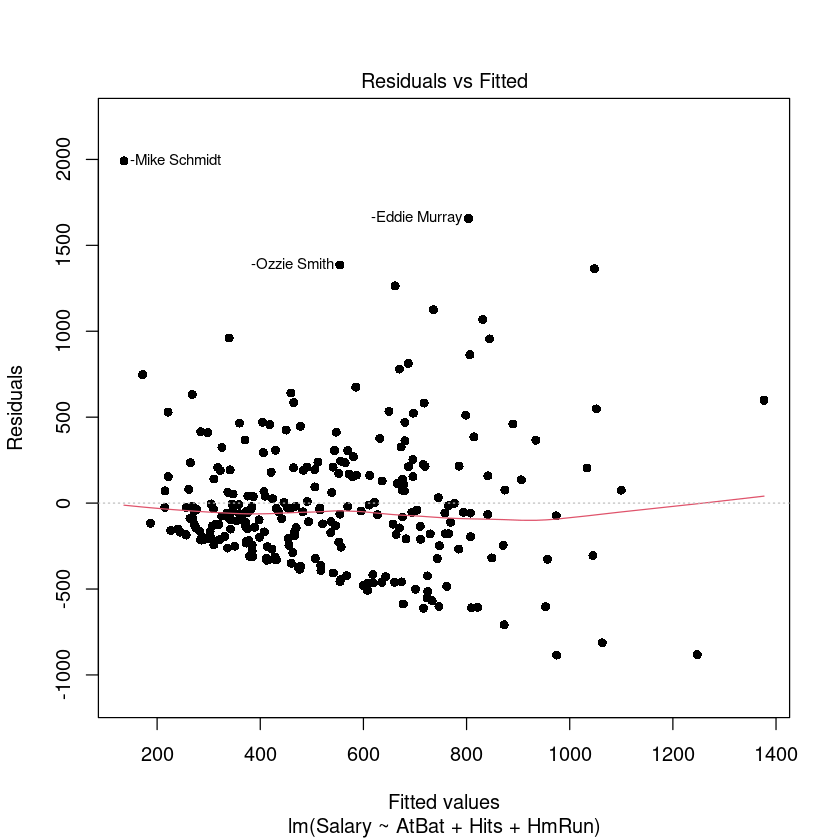

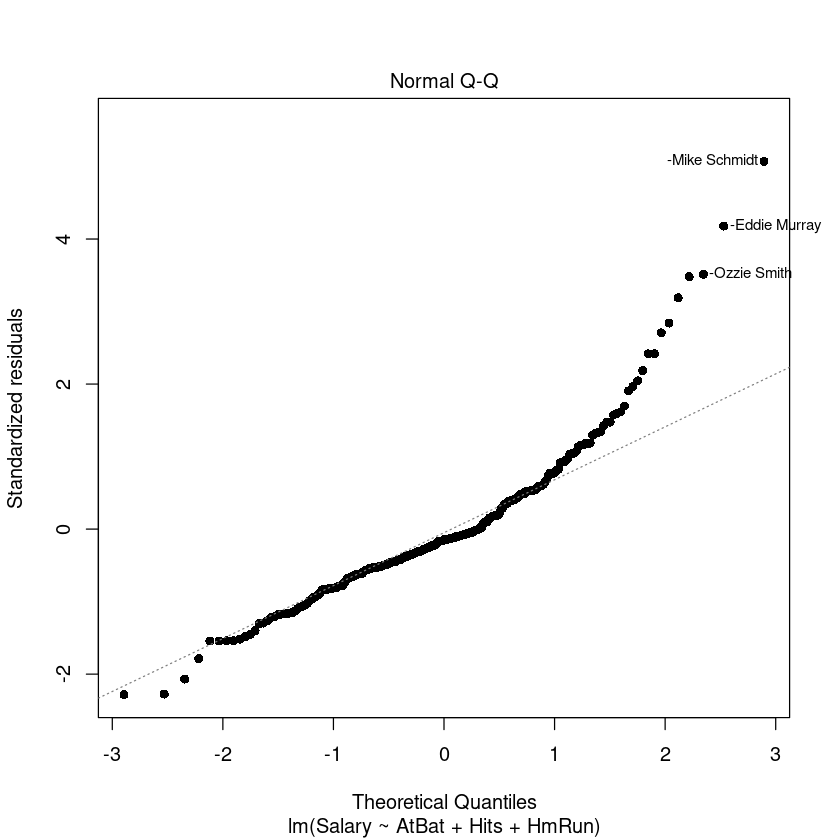

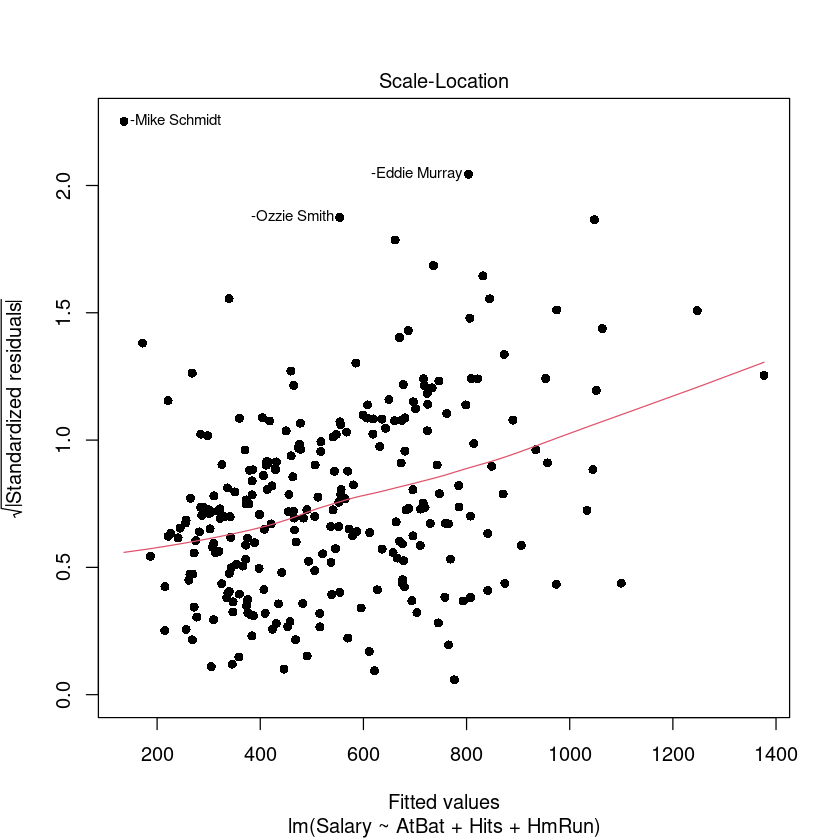

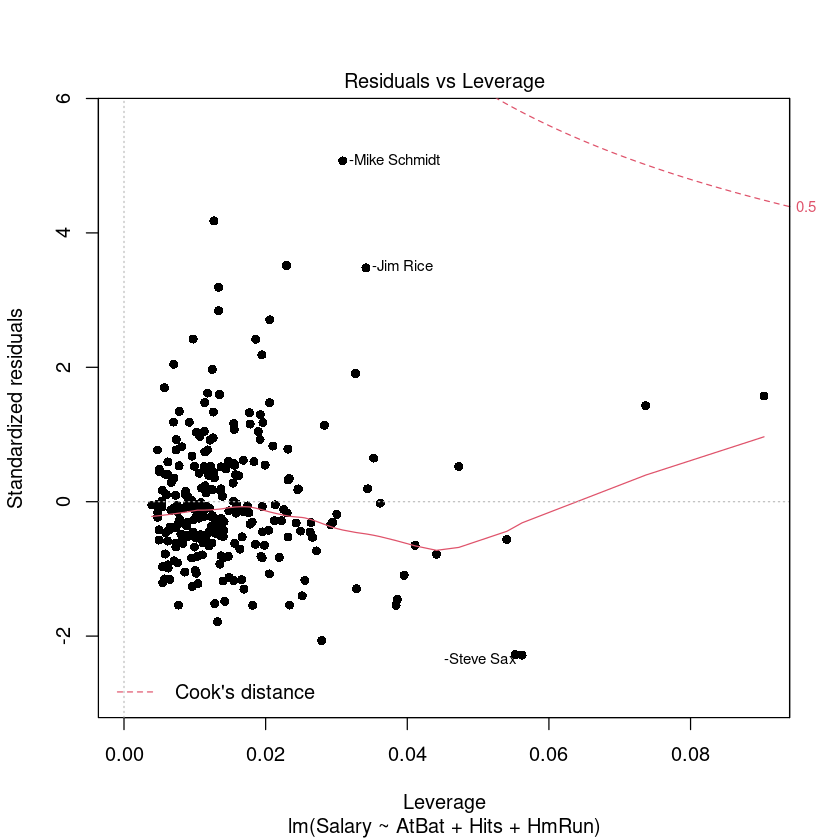

In [83]:
plot(reg_model, pch=16)

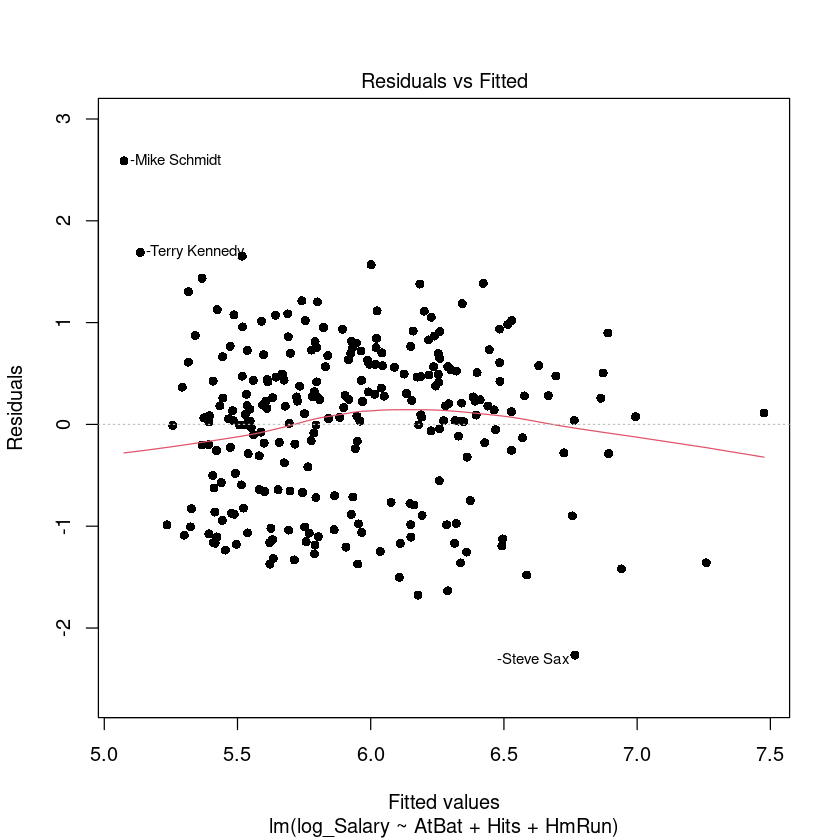

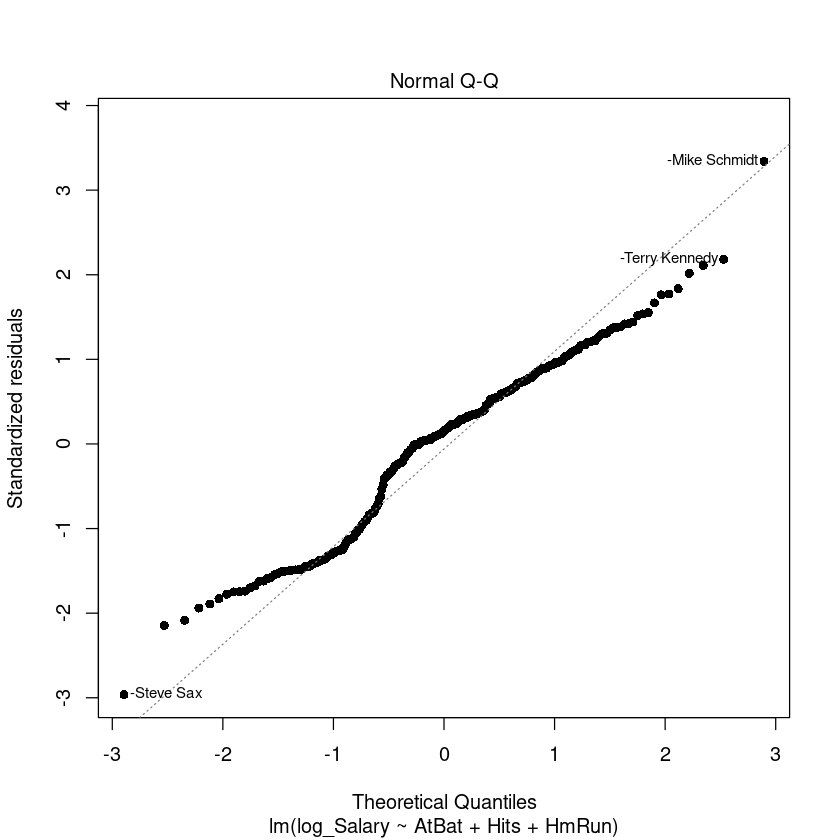

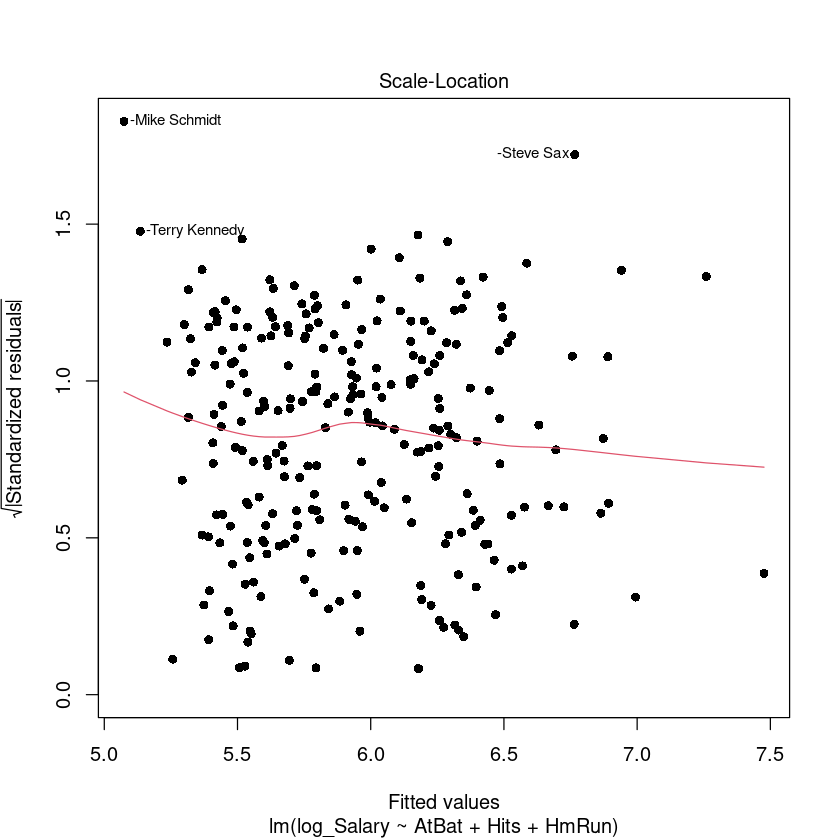

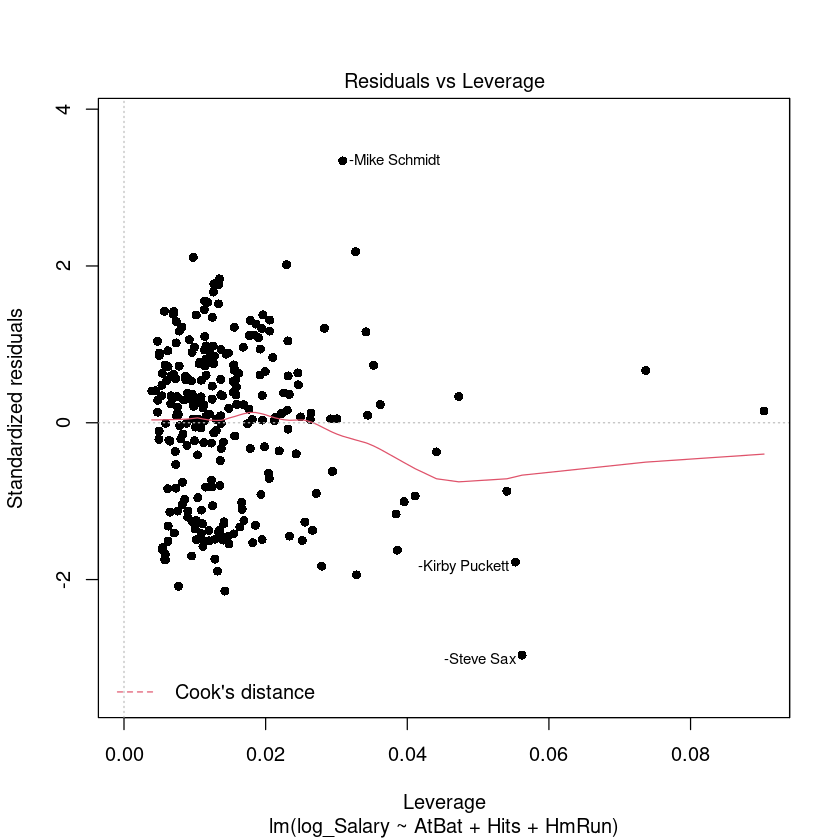

In [84]:
plot(reg_model_2, pch=16)